# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
genes = torch.load(
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

... storing 'current' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


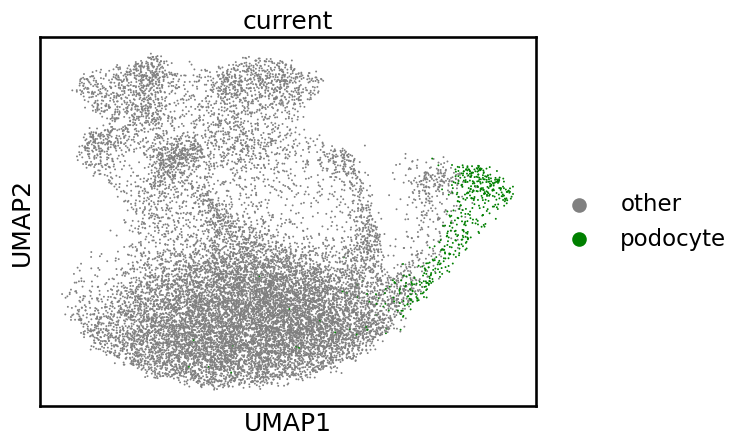

In [6]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


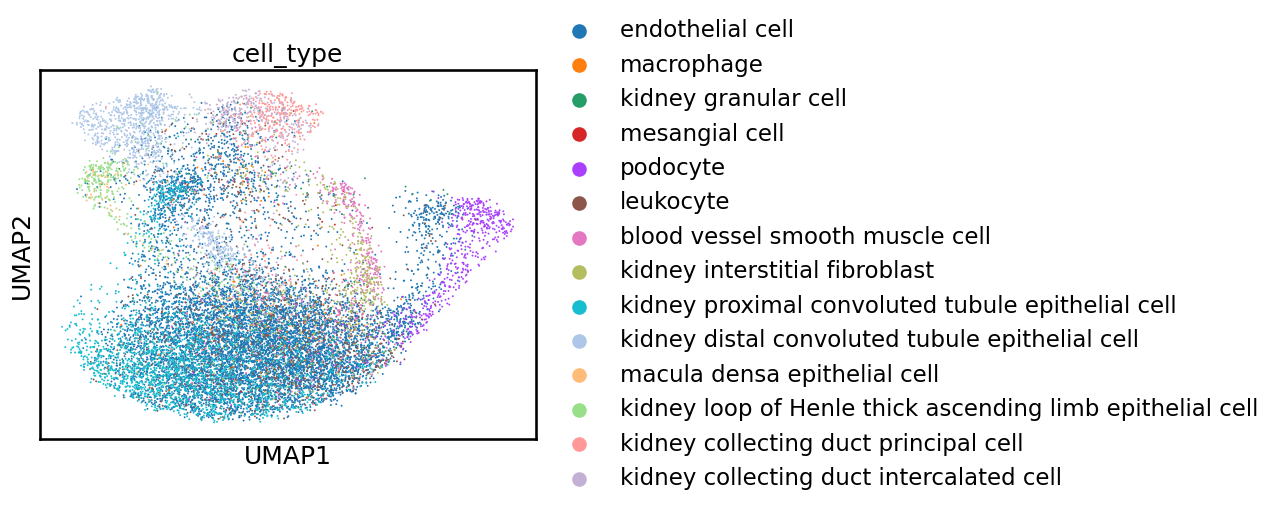

In [7]:
sc.pl.umap(adata, color=['cell_type'])

kidney distal convoluted tubule epithelial cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 74.65 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


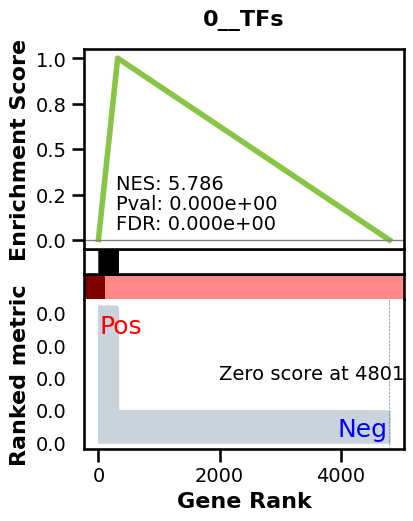

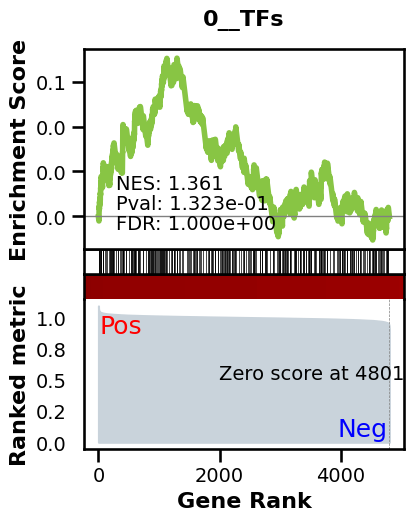

_________________________________________
TF specific enrichment


found some significant results for  9.67741935483871 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.004694979579192341 
recall:  0.3366297778824268 
random precision: 0.001085814360770578



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.45it/s]


  9%|▉         | 12/128 [00:00<00:02, 50.49it/s]


 14%|█▍        | 18/128 [00:00<00:02, 50.45it/s]


 19%|█▉        | 24/128 [00:00<00:02, 50.46it/s]


 23%|██▎       | 30/128 [00:00<00:01, 50.39it/s]


 28%|██▊       | 36/128 [00:00<00:01, 50.29it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.31it/s]


 38%|███▊      | 48/128 [00:00<00:01, 50.33it/s]


 42%|████▏     | 54/128 [00:01<00:01, 50.33it/s]


 47%|████▋     | 60/128 [00:01<00:01, 50.12it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.20it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 50.27it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.26it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 50.15it/s]


 70%|███████   | 90/128 [00:01<00:00, 50.09it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 50.16it/s]


 80%|███████▉  | 102/128 [00:02<00:00, 50.23it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.27it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.31it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.37it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.40it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.16it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0026139313045358283


EPR: 6.658363473886484


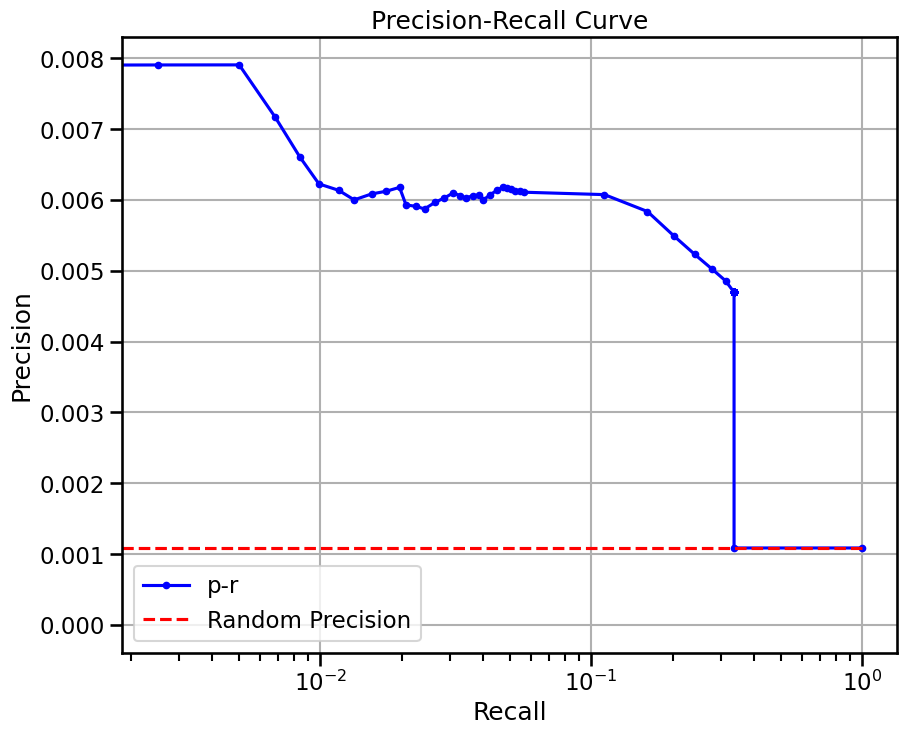

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 293.78 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


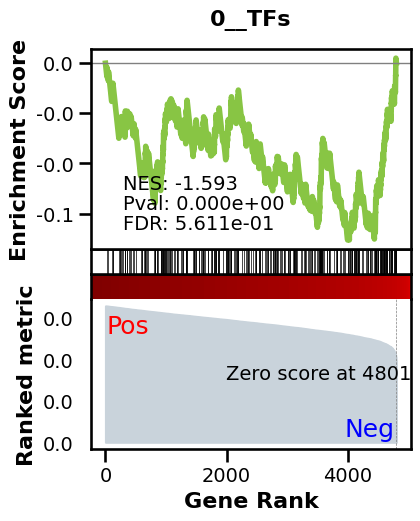

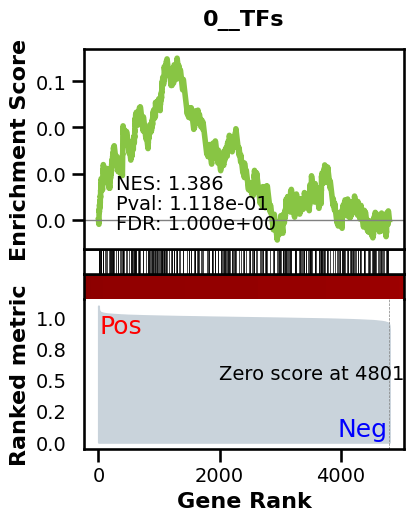

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.0011398253567891454 
recall:  0.7477435052193705 
random precision: 0.001085814360770578



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.32it/s]


  8%|▊         | 10/128 [00:00<00:02, 49.21it/s]


 12%|█▏        | 15/128 [00:00<00:02, 49.26it/s]


 16%|█▌        | 20/128 [00:00<00:02, 49.15it/s]


 20%|█▉        | 25/128 [00:00<00:02, 49.25it/s]


 23%|██▎       | 30/128 [00:00<00:01, 49.38it/s]


 27%|██▋       | 35/128 [00:00<00:01, 49.43it/s]


 31%|███▏      | 40/128 [00:00<00:01, 49.43it/s]


 35%|███▌      | 45/128 [00:00<00:01, 49.42it/s]


 39%|███▉      | 50/128 [00:01<00:01, 49.47it/s]


 43%|████▎     | 55/128 [00:01<00:01, 49.45it/s]


 47%|████▋     | 60/128 [00:01<00:01, 49.48it/s]


 51%|█████     | 65/128 [00:01<00:01, 49.48it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 49.50it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 49.49it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 49.41it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 49.42it/s]


 70%|███████   | 90/128 [00:01<00:00, 49.42it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 49.46it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 49.47it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 49.52it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 49.47it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 49.52it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 48.80it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 48.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 49.31it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001090665244680414


EPR: 1.5196712019401923


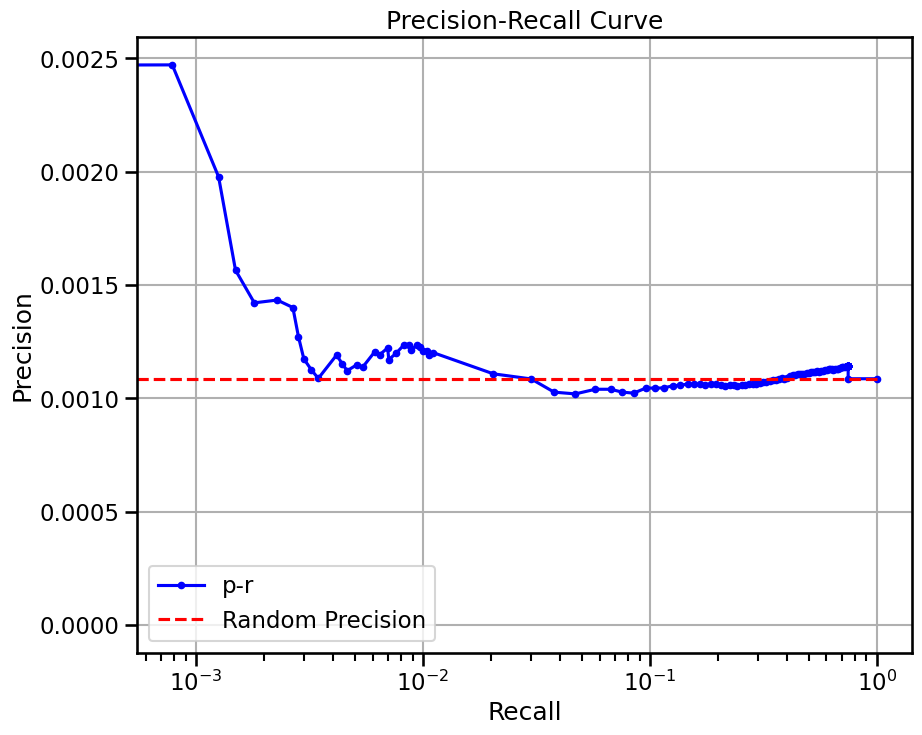

kidney loop of Henle thick ascending limb epithelial cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 39.97 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


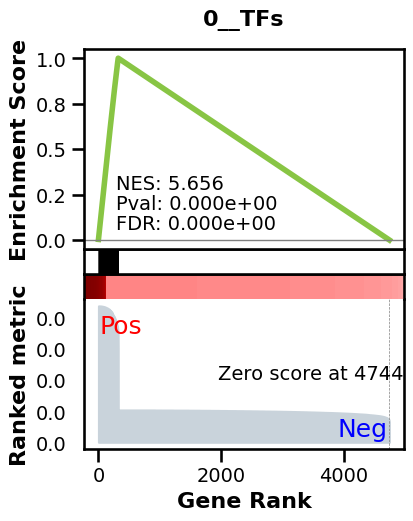

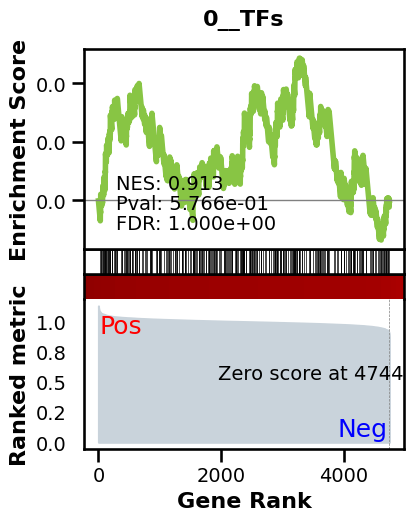

_________________________________________
TF specific enrichment


found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.006090682237634753 
recall:  0.40004445761707175 
random precision: 0.0012108833796207323



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.94it/s]


  9%|▉         | 12/128 [00:00<00:02, 51.14it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.17it/s]


 19%|█▉        | 24/128 [00:00<00:02, 51.17it/s]


 23%|██▎       | 30/128 [00:00<00:01, 51.21it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.21it/s]


 33%|███▎      | 42/128 [00:00<00:01, 51.22it/s]


 38%|███▊      | 48/128 [00:00<00:01, 51.24it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.22it/s]


 47%|████▋     | 60/128 [00:01<00:01, 51.17it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 51.22it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.25it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.23it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.17it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.18it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.20it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.23it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 51.10it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.75it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.41it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 49.47it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.82it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0031736610112009893


EPR: 4.006350240130978


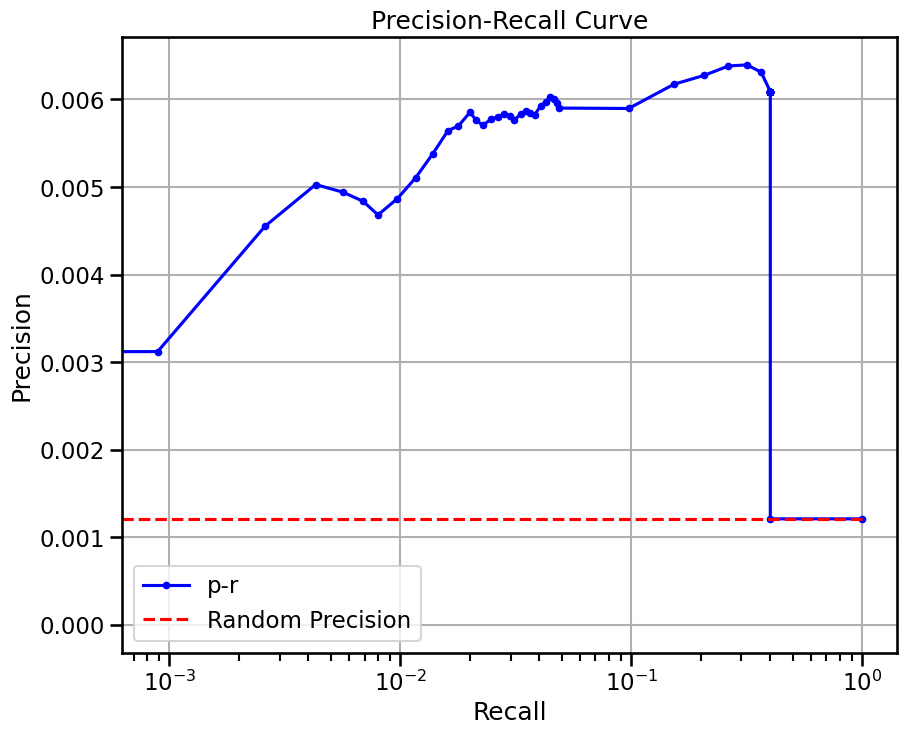

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 81.50 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


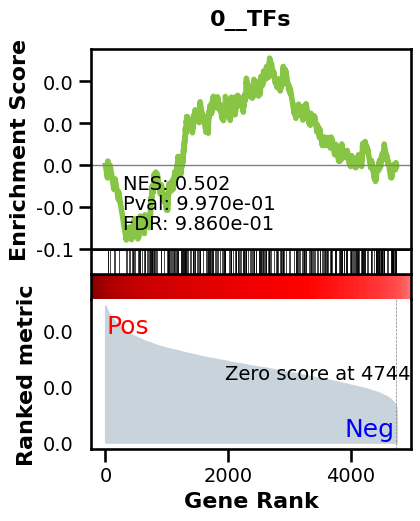

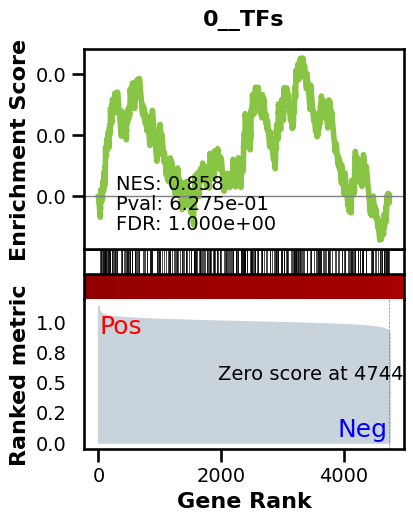

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.0013075128898513333 
recall:  0.39871072910492 
random precision: 0.0012108833796207323



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.85it/s]


  9%|▉         | 12/128 [00:00<00:02, 51.96it/s]


 14%|█▍        | 18/128 [00:00<00:02, 52.15it/s]


 19%|█▉        | 24/128 [00:00<00:01, 52.22it/s]


 23%|██▎       | 30/128 [00:00<00:01, 52.14it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.08it/s]


 33%|███▎      | 42/128 [00:00<00:01, 52.19it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.24it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.97it/s]


 47%|████▋     | 60/128 [00:01<00:01, 52.01it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 52.09it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 52.12it/s]


 61%|██████    | 78/128 [00:01<00:00, 52.16it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 52.18it/s]


 70%|███████   | 90/128 [00:01<00:00, 52.20it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 52.21it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 52.07it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 51.99it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 51.99it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 52.00it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 51.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 52.06it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012068530589728617


EPR: 0.7338274325984075


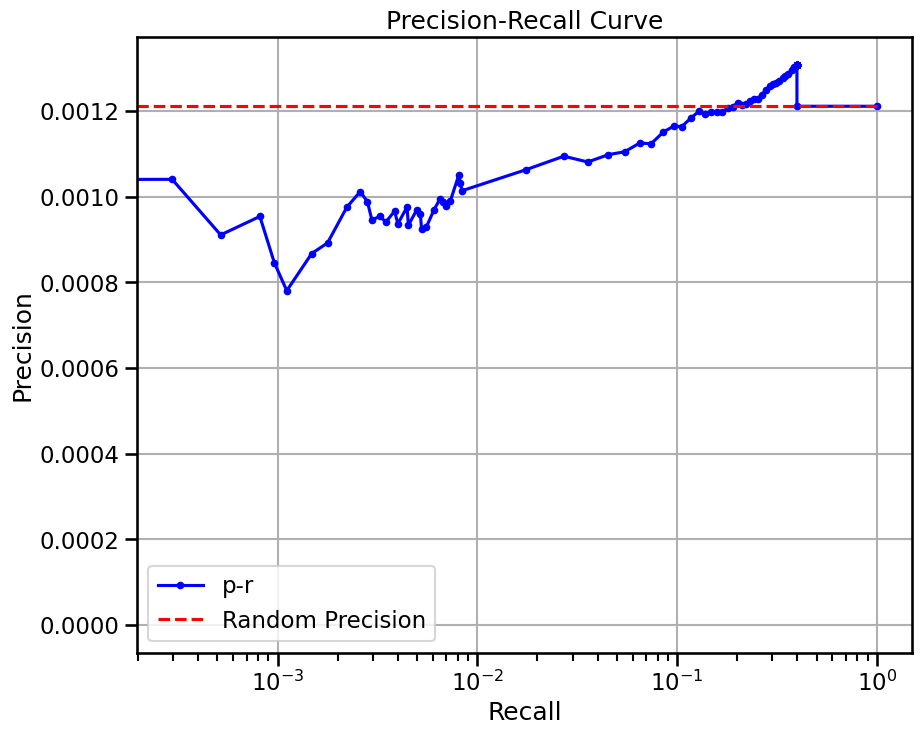

kidney collecting duct principal cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 48.80 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


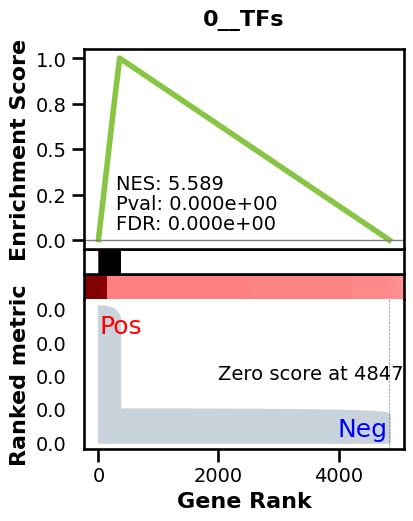

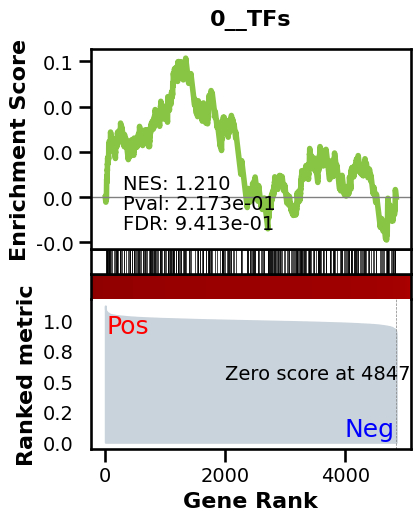

_________________________________________
TF specific enrichment


found some significant results for  2.857142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.007205213634392835 
recall:  0.441524926686217 
random precision: 0.0013922345159841588



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.71it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.69it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.63it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.64it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.63it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.63it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.61it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.64it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.66it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.68it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.68it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.63it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.62it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.61it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.63it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.70it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.71it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.67it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.52it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.58it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.57it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.63it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.68it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.61it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.59it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.62it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005049925465584158
EPR: 10.817610898526077


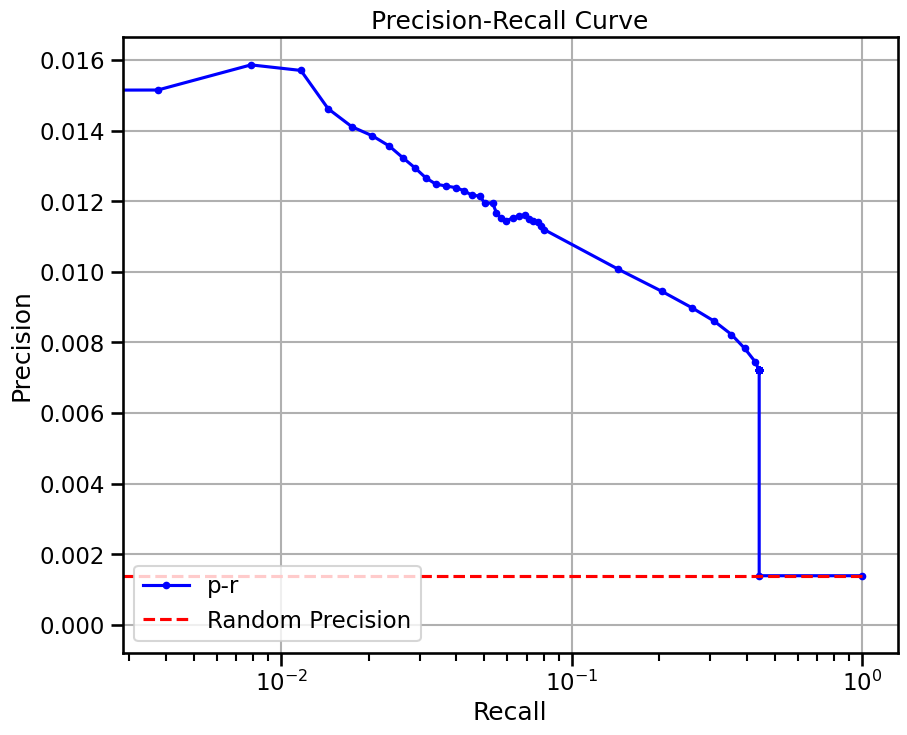

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 115.86 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


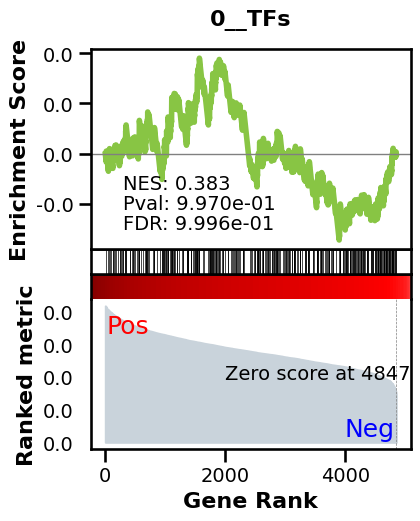

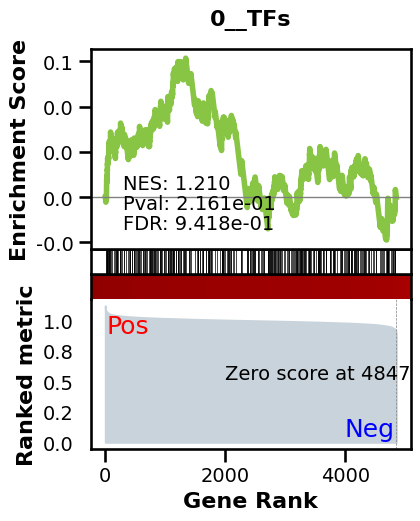

_________________________________________
TF specific enrichment


found some significant results for  1.4285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.0015579225770166992 
recall:  0.5179472140762463 
random precision: 0.0013922345159841588



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.66it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.64it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.55it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.57it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.62it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.65it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.59it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.55it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.62it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.62it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.64it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.65it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.67it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.69it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.76it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.75it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.78it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.80it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.86it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.05it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.02it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.81it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.47it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.34it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.46it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.62it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001456768788010336
EPR: 1.1801545232588688


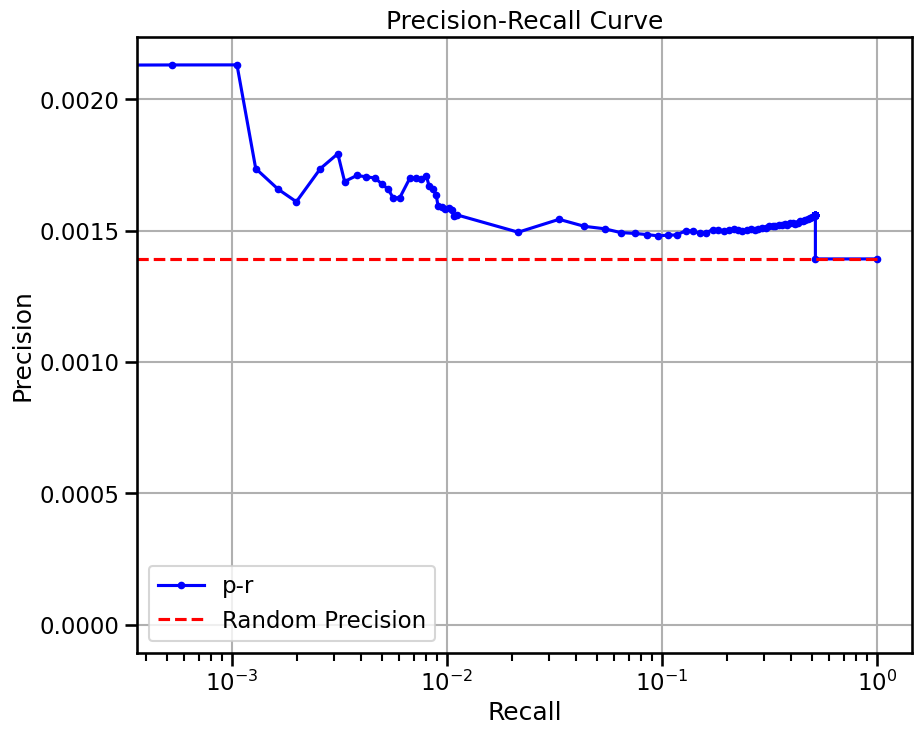

mesangial cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 23.45 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


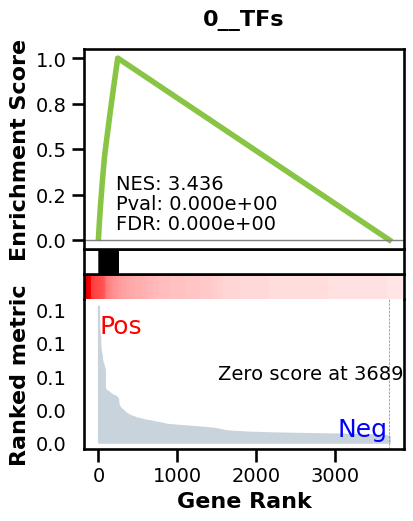

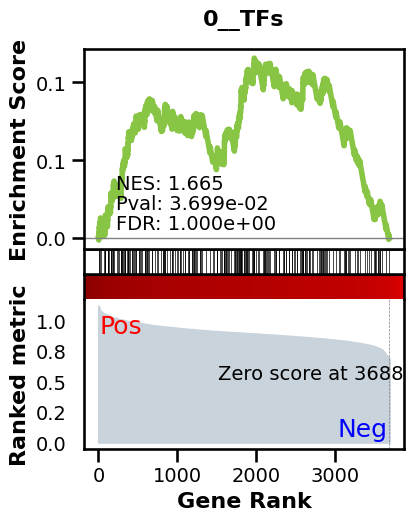

_________________________________________
TF specific enrichment


found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.010798292164844455 
recall:  0.17445196832319523 
random precision: 0.0012226661221992553



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 79.93it/s]


 13%|█▎        | 17/128 [00:00<00:01, 80.32it/s]


 20%|██        | 26/128 [00:00<00:01, 80.51it/s]


 27%|██▋       | 35/128 [00:00<00:01, 80.35it/s]


 34%|███▍      | 44/128 [00:00<00:01, 80.50it/s]


 41%|████▏     | 53/128 [00:00<00:00, 80.51it/s]


 48%|████▊     | 62/128 [00:00<00:00, 80.55it/s]


 55%|█████▌    | 71/128 [00:00<00:00, 80.47it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 80.50it/s]


 70%|██████▉   | 89/128 [00:01<00:00, 80.36it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 80.44it/s]


 84%|████████▎ | 107/128 [00:01<00:00, 80.51it/s]


 91%|█████████ | 116/128 [00:01<00:00, 80.56it/s]


 98%|█████████▊| 125/128 [00:01<00:00, 80.58it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 80.44it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002719889243482893


EPR: 6.661466232067332


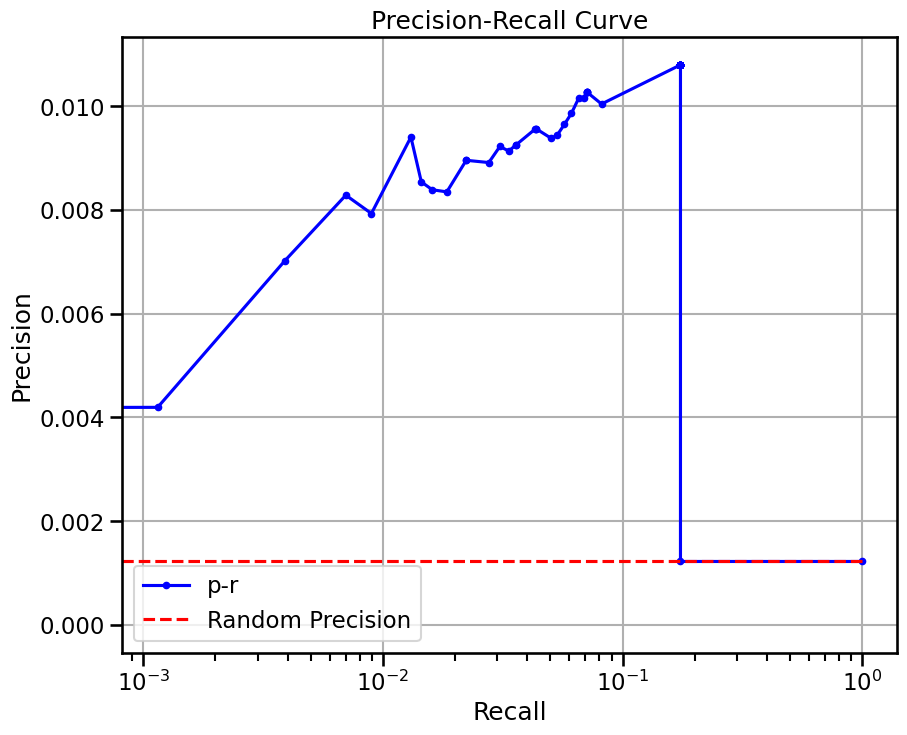

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 24.30 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


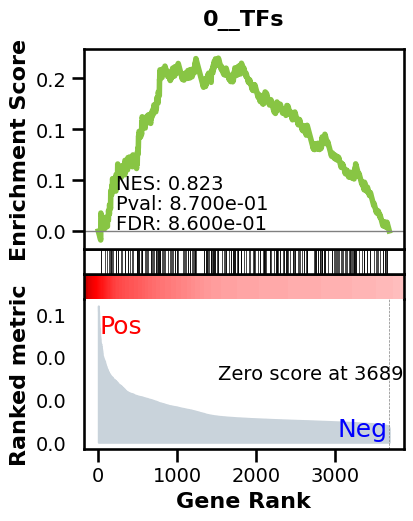

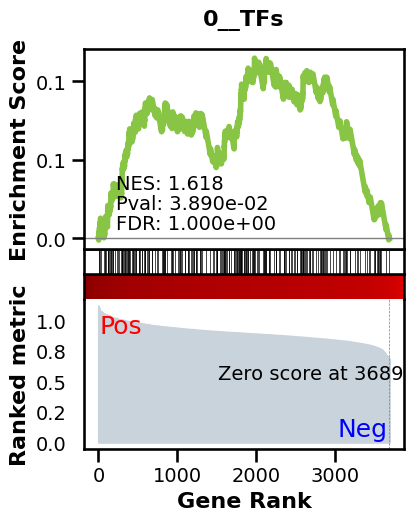

_________________________________________
TF specific enrichment


found some significant results for  2.380952380952381 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.001702942898195945 
recall:  0.03305405715597383 
random precision: 0.0012226661221992553



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 80.19it/s]


 14%|█▍        | 18/128 [00:00<00:01, 80.46it/s]


 21%|██        | 27/128 [00:00<00:01, 80.62it/s]


 28%|██▊       | 36/128 [00:00<00:01, 80.65it/s]


 35%|███▌      | 45/128 [00:00<00:01, 80.71it/s]


 42%|████▏     | 54/128 [00:00<00:00, 80.76it/s]


 49%|████▉     | 63/128 [00:00<00:00, 80.71it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 80.60it/s]


 63%|██████▎   | 81/128 [00:01<00:00, 80.65it/s]


 70%|███████   | 90/128 [00:01<00:00, 80.70it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 80.68it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 80.67it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 80.61it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 80.61it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 80.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012303352825598752
EPR: 0.8445042408873878


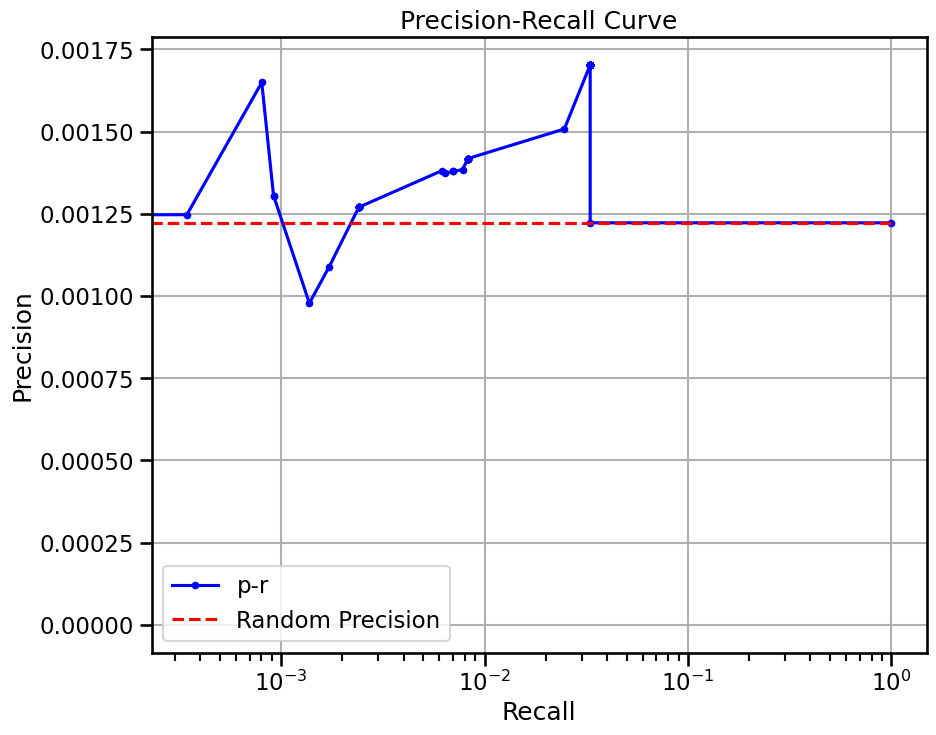

blood vessel smooth muscle cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 38.61 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


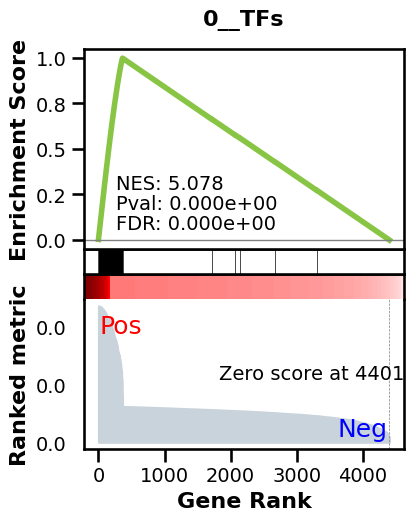

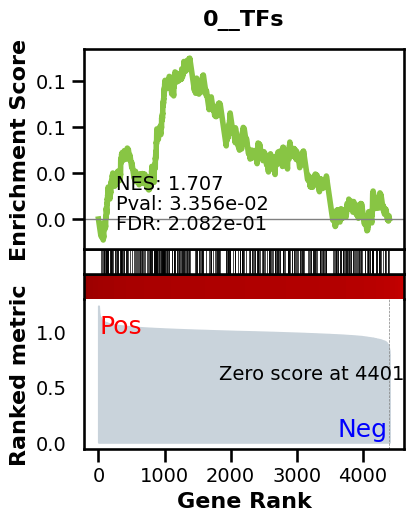

_________________________________________
TF specific enrichment


found some significant results for  9.433962264150944 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.00803943374109585 
recall:  0.3946762674850971 
random precision: 0.001644809332009176



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.31it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.99it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.61it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.89it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.05it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.16it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.28it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.31it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.32it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.29it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.35it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.36it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.35it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.36it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.32it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.60it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.72it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.39it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.14it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.02it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.11it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005112482137290242
EPR: 7.137739380664012


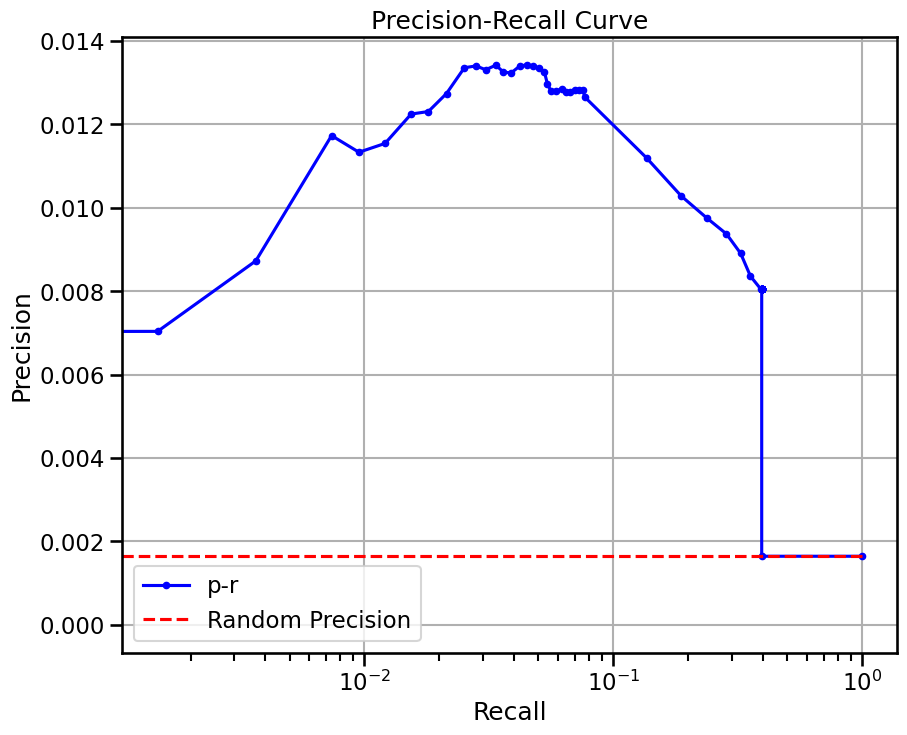

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 62.26 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


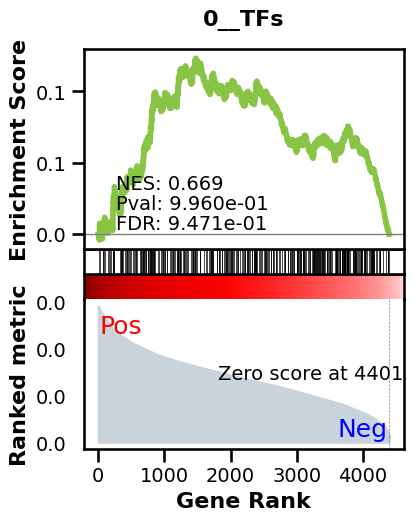

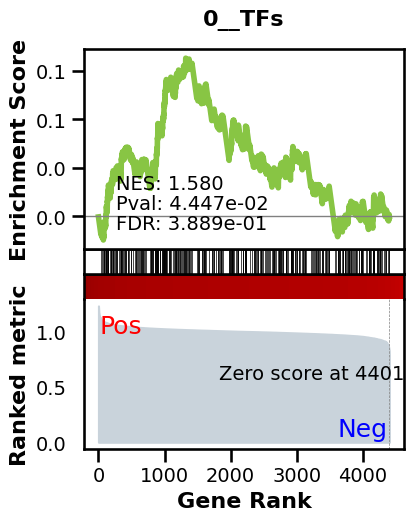

_________________________________________
TF specific enrichment


found some significant results for  1.8867924528301887 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.0021848716172145543 
recall:  0.38098329693678806 
random precision: 0.001644809332009176



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.42it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.73it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.19it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.98it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.69it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.47it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.30it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.17it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.81it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.73it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.96it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.14it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.32it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.40it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.49it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.52it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.59it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.62it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.62it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.62it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.42it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018093362418428478


EPR: 1.0407593071217598


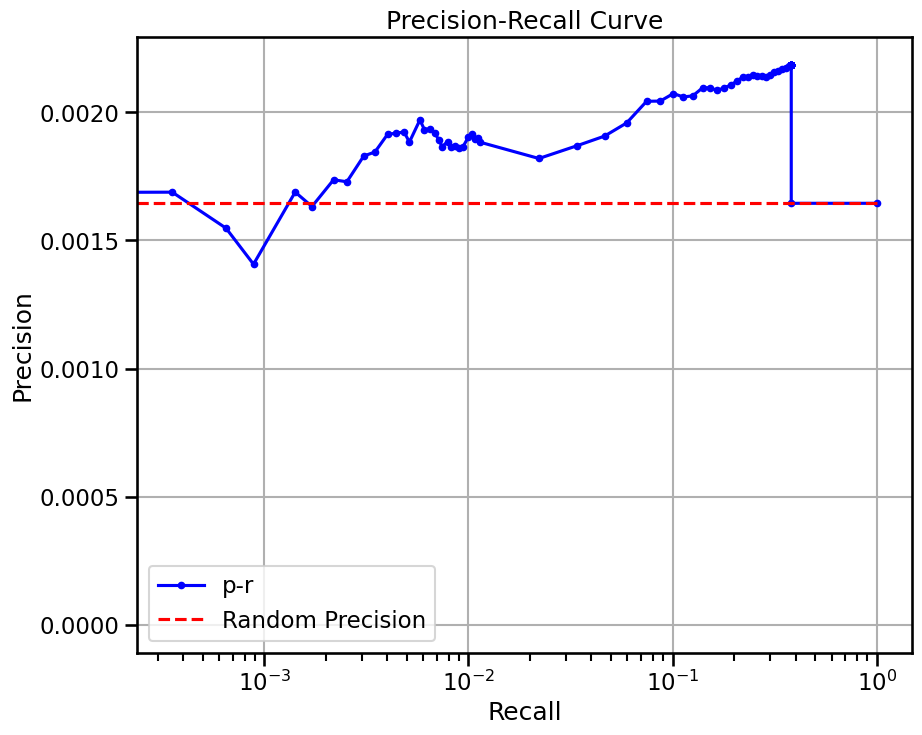

podocyte
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 46.17 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


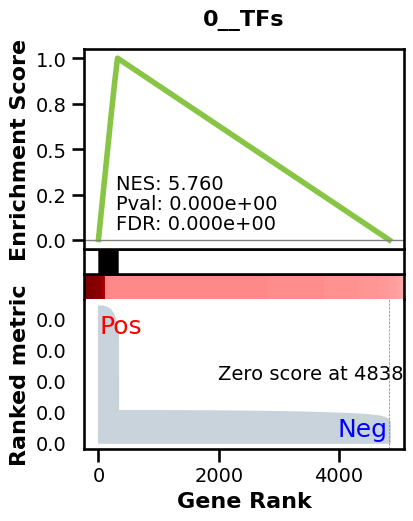

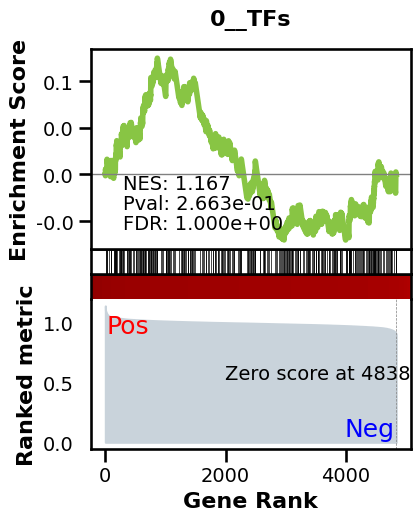

_________________________________________
TF specific enrichment


found some significant results for  2.127659574468085 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.008797402671592196 
recall:  0.4496836640891148 
random precision: 0.0015213461490683946



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 39.35it/s]


  6%|▋         | 8/128 [00:00<00:03, 39.36it/s]


  9%|▉         | 12/128 [00:00<00:02, 39.45it/s]


 12%|█▎        | 16/128 [00:00<00:02, 39.43it/s]


 16%|█▌        | 20/128 [00:00<00:02, 39.46it/s]


 19%|█▉        | 24/128 [00:00<00:02, 39.46it/s]


 22%|██▏       | 28/128 [00:00<00:02, 39.40it/s]


 25%|██▌       | 32/128 [00:00<00:02, 39.45it/s]


 28%|██▊       | 36/128 [00:00<00:02, 39.50it/s]


 31%|███▏      | 40/128 [00:01<00:02, 39.52it/s]


 34%|███▍      | 44/128 [00:01<00:02, 39.47it/s]


 38%|███▊      | 48/128 [00:01<00:02, 39.49it/s]


 41%|████      | 52/128 [00:01<00:01, 39.47it/s]


 44%|████▍     | 56/128 [00:01<00:01, 39.45it/s]


 47%|████▋     | 60/128 [00:01<00:01, 39.41it/s]


 50%|█████     | 64/128 [00:01<00:01, 39.46it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 39.46it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 39.49it/s]


 59%|█████▉    | 76/128 [00:01<00:01, 39.54it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 39.57it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 39.60it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 39.61it/s]


 72%|███████▏  | 92/128 [00:02<00:00, 39.61it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 39.57it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 39.55it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 39.54it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 39.50it/s]


 88%|████████▊ | 112/128 [00:02<00:00, 39.21it/s]


 91%|█████████ | 116/128 [00:02<00:00, 39.27it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 39.30it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 39.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:03<00:00, 39.40it/s]


100%|██████████| 128/128 [00:03<00:00, 39.45it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004892323160199452


EPR: 5.989453098440718


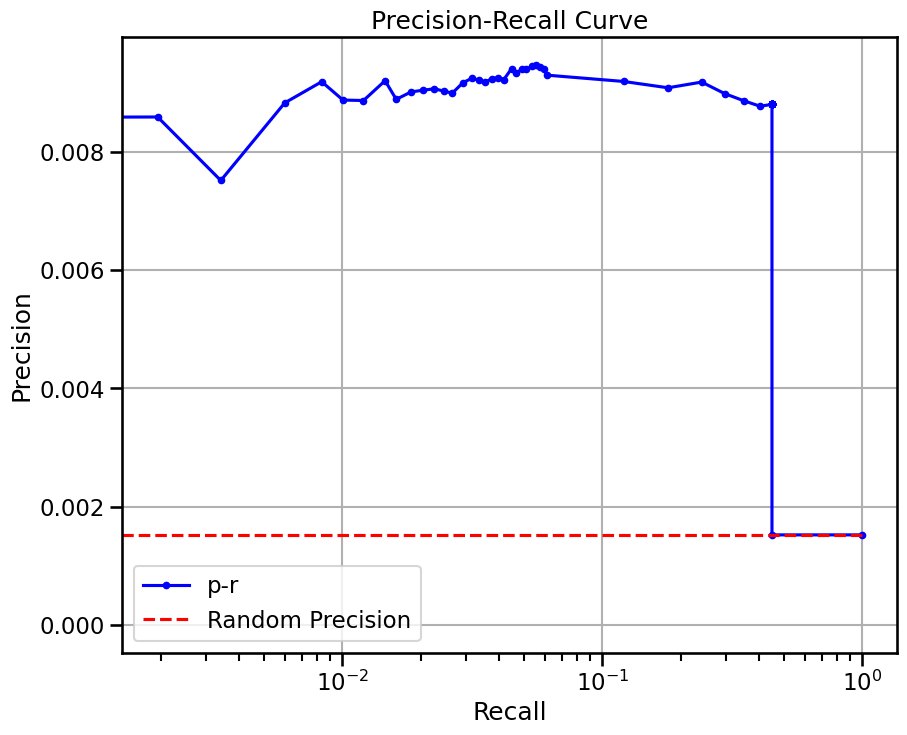

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 116.25 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


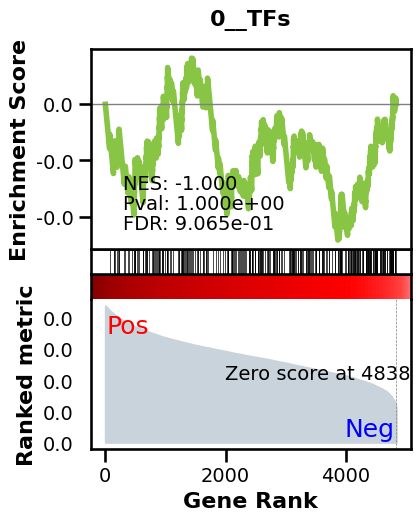

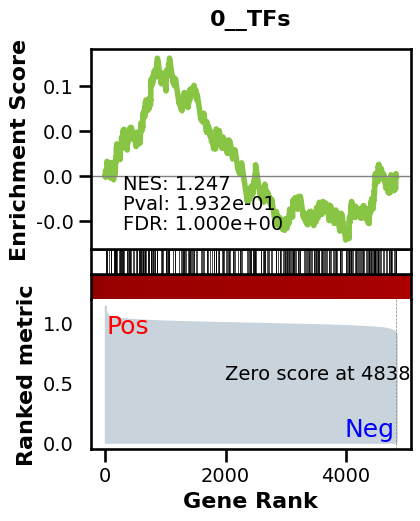

_________________________________________
TF specific enrichment


found some significant results for  2.127659574468085 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.0016622357060623778 
recall:  0.46704158330178985 
random precision: 0.0015213461490683946



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 47.06it/s]


  8%|▊         | 10/128 [00:00<00:02, 46.91it/s]


 12%|█▏        | 15/128 [00:00<00:02, 46.73it/s]


 16%|█▌        | 20/128 [00:00<00:02, 46.63it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.59it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.65it/s]


 27%|██▋       | 35/128 [00:00<00:01, 46.65it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.61it/s]


 35%|███▌      | 45/128 [00:00<00:01, 46.73it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.69it/s]


 43%|████▎     | 55/128 [00:01<00:01, 46.75it/s]


 47%|████▋     | 60/128 [00:01<00:01, 46.60it/s]


 51%|█████     | 65/128 [00:01<00:01, 46.51it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 46.46it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 46.19it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.23it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.30it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.44it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.46it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.48it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.57it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 46.45it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 46.47it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 46.53it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.52it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.53it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001529437035268007


EPR: 0.852670485406647


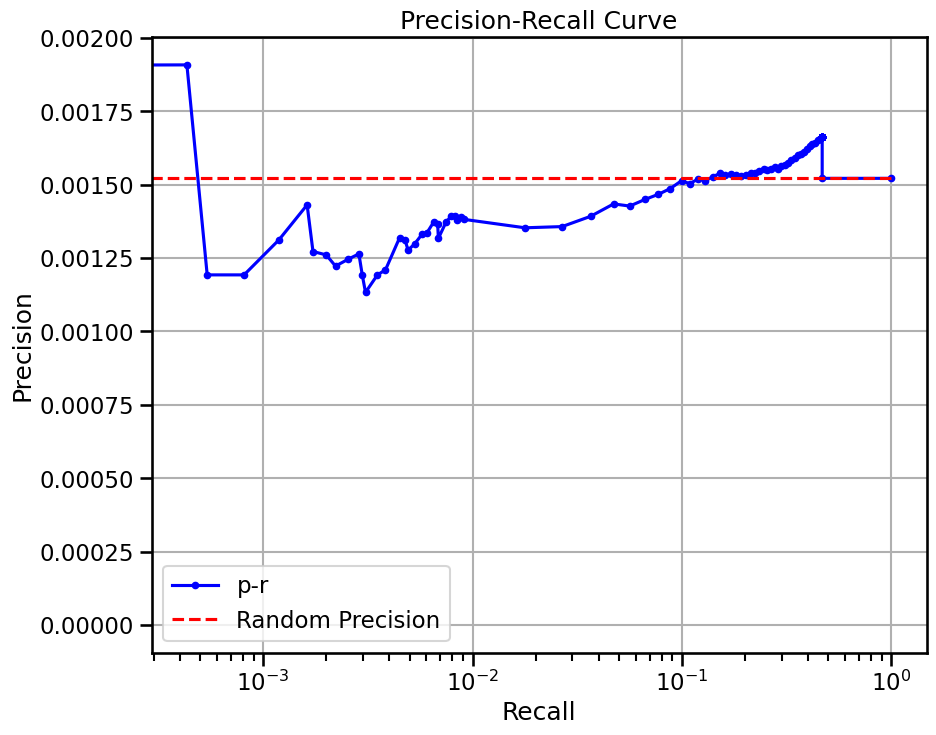

macrophage
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 29.82 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


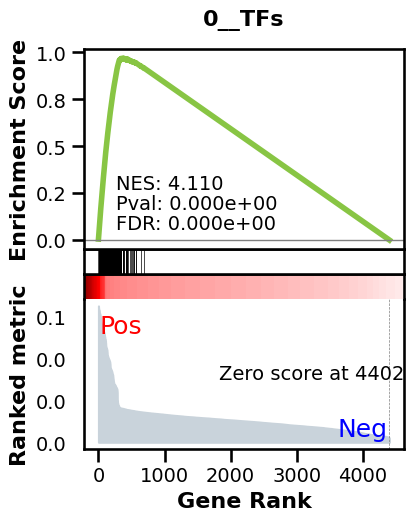

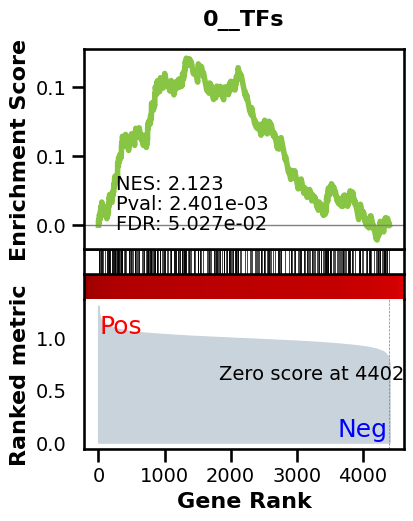

_________________________________________
TF specific enrichment


found some significant results for  2.4390243902439024 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.00965487532517503 
recall:  0.3318240620957309 
random precision: 0.001400933069350315



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 57.46it/s]


  9%|▉         | 12/128 [00:00<00:02, 57.95it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.02it/s]


 19%|█▉        | 24/128 [00:00<00:01, 57.99it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.10it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.12it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.23it/s]


 38%|███▊      | 48/128 [00:00<00:01, 57.51it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.75it/s]


 47%|████▋     | 60/128 [00:01<00:01, 57.84it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.01it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.13it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.16it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.17it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.19it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.22it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.16it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.19it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.25it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 58.29it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 58.24it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.03it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00431544662620963


EPR: 6.511274732958851


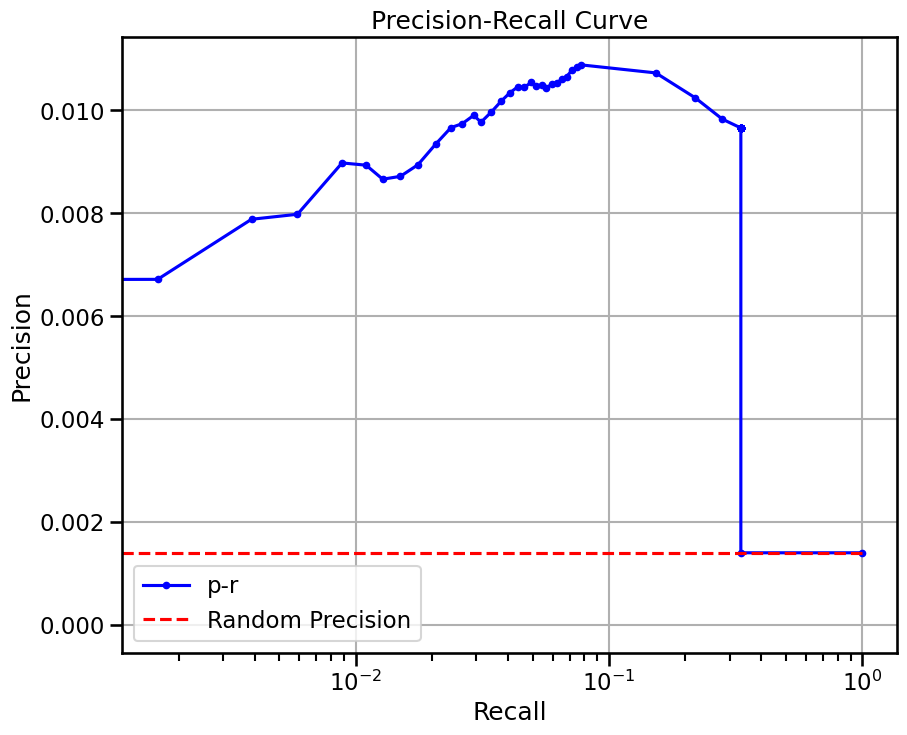

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 30.87 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


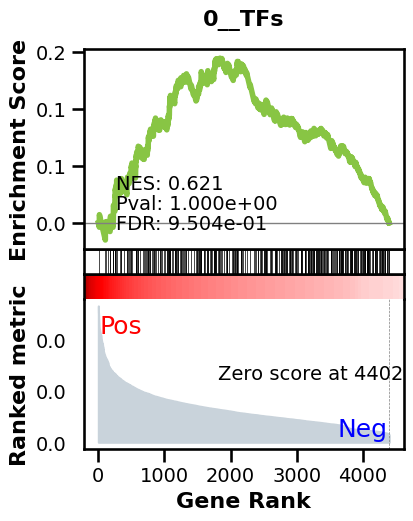

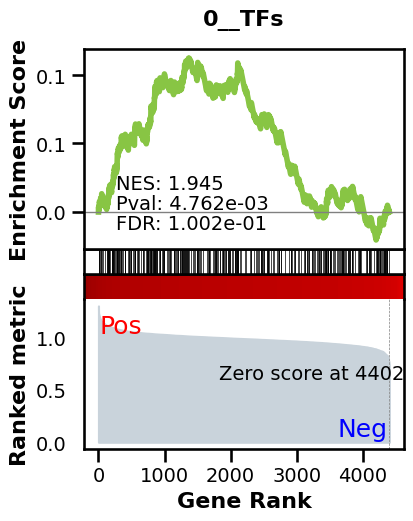

_________________________________________
TF specific enrichment


found some significant results for  2.4390243902439024 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.0018473858809234208 
recall:  0.10730199798763836 
random precision: 0.001400933069350315



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 57.46it/s]


  9%|▉         | 12/128 [00:00<00:02, 57.28it/s]


 14%|█▍        | 18/128 [00:00<00:01, 57.00it/s]


 19%|█▉        | 24/128 [00:00<00:01, 57.14it/s]


 23%|██▎       | 30/128 [00:00<00:01, 57.18it/s]


 28%|██▊       | 36/128 [00:00<00:01, 57.27it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.32it/s]


 38%|███▊      | 48/128 [00:00<00:01, 57.33it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.38it/s]


 47%|████▋     | 60/128 [00:01<00:01, 57.31it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 57.34it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 57.37it/s]


 61%|██████    | 78/128 [00:01<00:00, 57.37it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 57.42it/s]


 70%|███████   | 90/128 [00:01<00:00, 57.48it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 57.47it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 57.32it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 57.30it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 57.38it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 57.43it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 57.47it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 57.33it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001425588250833675
EPR: 0.9232296691037194


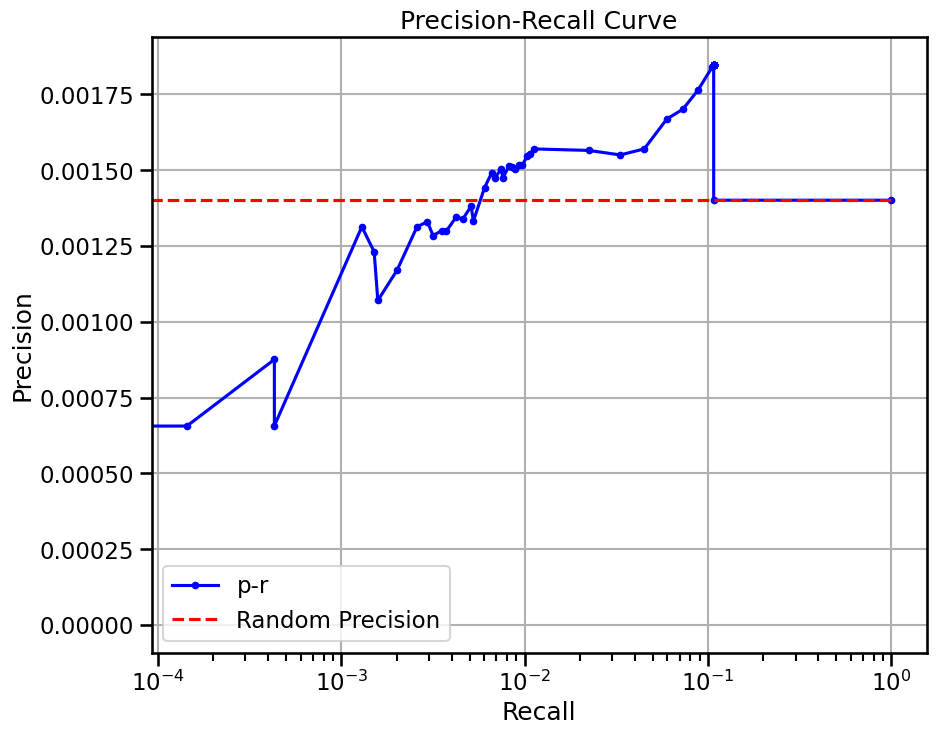

leukocyte
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 26.56 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


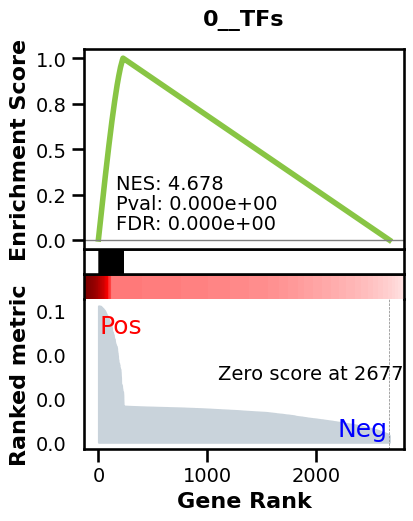

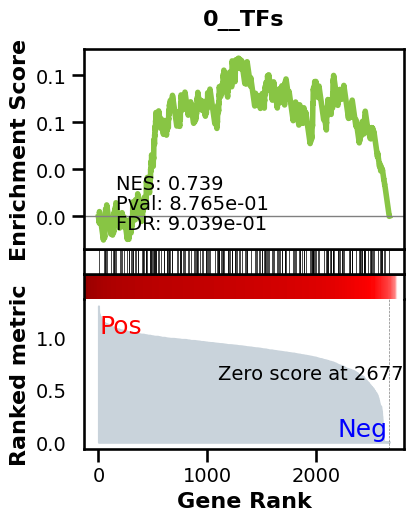

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.007785467128027681 
recall:  0.42633637548891784 
random precision: 0.001419581713862669



  0%|          | 0/128 [00:00<?, ?it/s]


 14%|█▍        | 18/128 [00:00<00:00, 175.87it/s]


 28%|██▊       | 36/128 [00:00<00:00, 176.28it/s]


 42%|████▏     | 54/128 [00:00<00:00, 177.48it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 177.71it/s]


 70%|███████   | 90/128 [00:00<00:00, 177.85it/s]


 84%|████████▍ | 108/128 [00:00<00:00, 178.29it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 178.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 177.64it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005607606383282717
EPR: 13.631811427688266


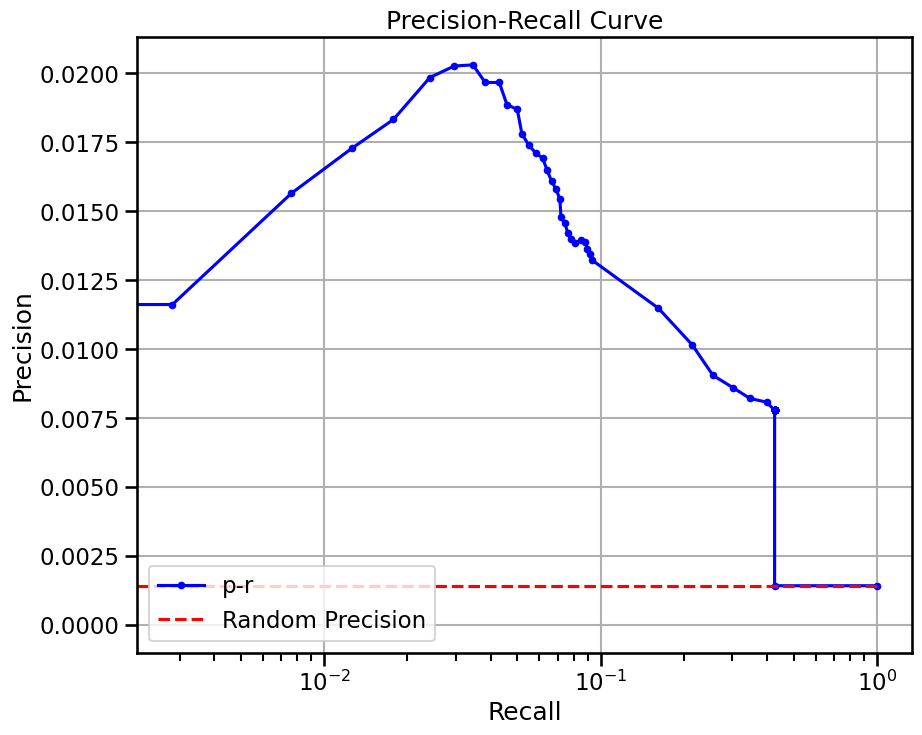

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 37.29 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


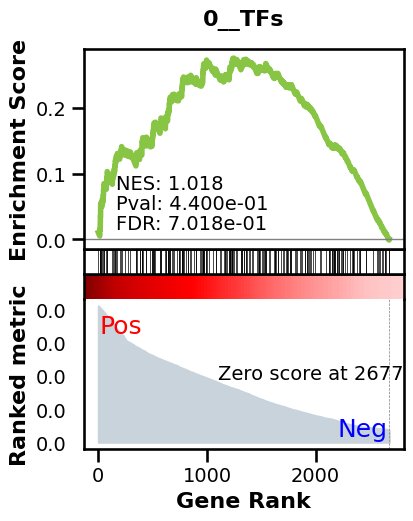

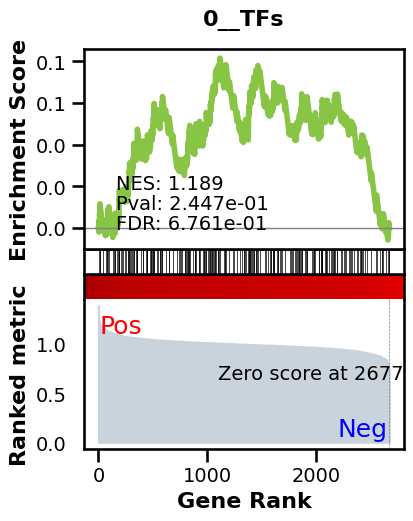

_________________________________________
TF specific enrichment


found some significant results for  5.2631578947368425 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.0018055610156070111 
recall:  0.2794437201216862 
random precision: 0.001419581713862669



  0%|          | 0/128 [00:00<?, ?it/s]


 14%|█▍        | 18/128 [00:00<00:00, 177.50it/s]


 28%|██▊       | 36/128 [00:00<00:00, 177.95it/s]


 42%|████▏     | 54/128 [00:00<00:00, 177.97it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 178.21it/s]


 70%|███████   | 90/128 [00:00<00:00, 178.46it/s]


 84%|████████▍ | 108/128 [00:00<00:00, 178.66it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 178.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 178.17it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016306205686089374
EPR: 0.9182130221079972


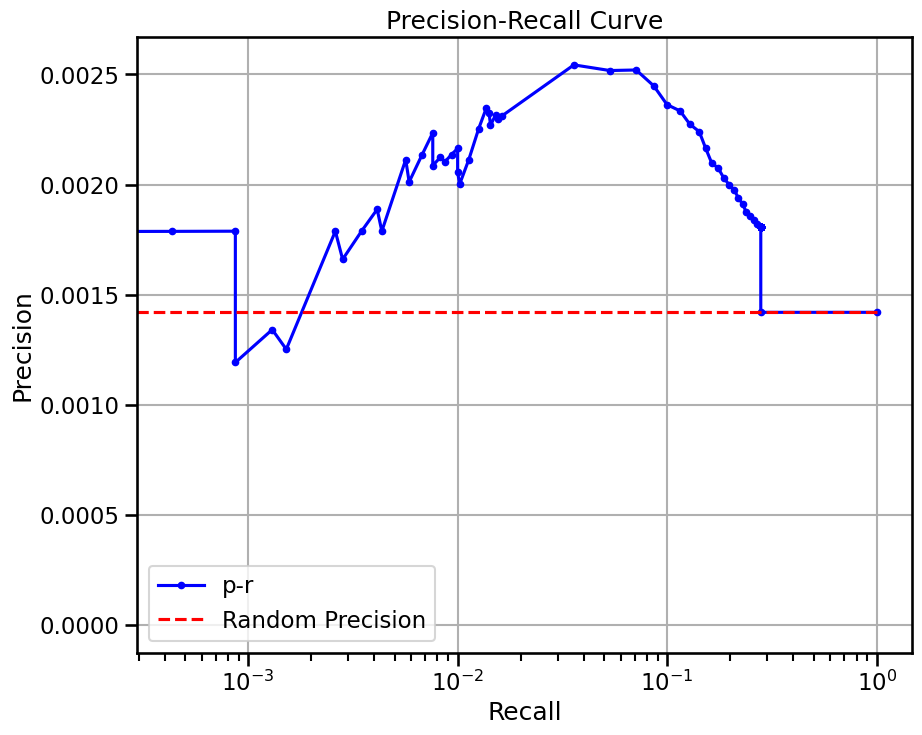

kidney interstitial fibroblast
Tree method: RF
K: sqrt
Number of trees: 100




running jobs on 20 threads


Elapsed time: 32.02 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


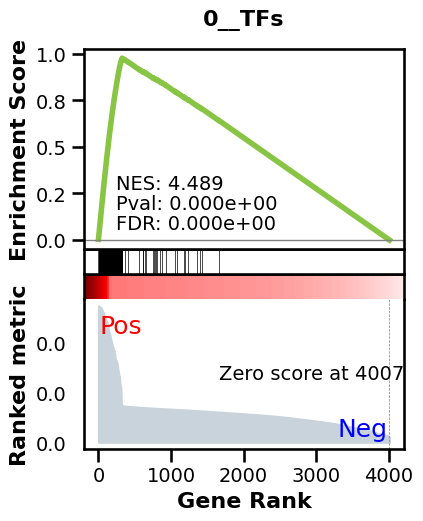

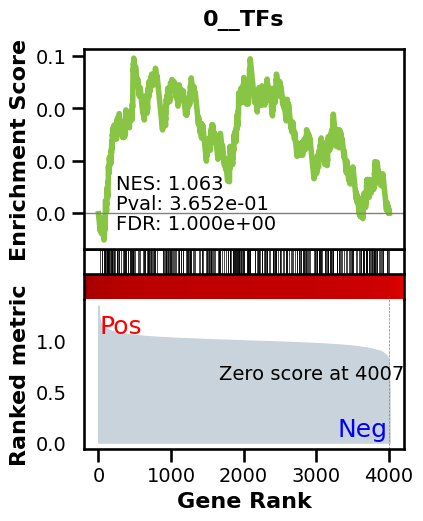

_________________________________________
TF specific enrichment


found some significant results for  4.651162790697675 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.009439708733470938 
recall:  0.410784610724023 
random precision: 0.0016125679668576004



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.32it/s]


 11%|█         | 14/128 [00:00<00:01, 68.48it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.42it/s]


 22%|██▏       | 28/128 [00:00<00:01, 67.87it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.14it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.19it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.30it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.44it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.40it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.35it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.44it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.55it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.58it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.64it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.56it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.55it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.57it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.59it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.41it/s]

Area Under Precision-Recall Curve (AUPRC):  0.006137700413549414
EPR: 7.380613390877997


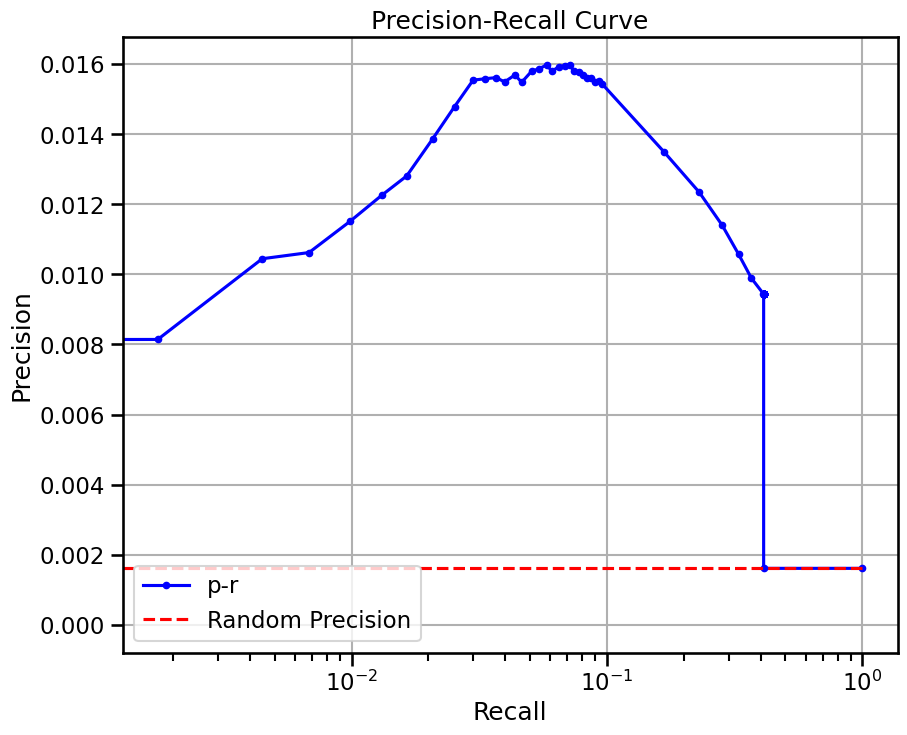

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 48.11 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


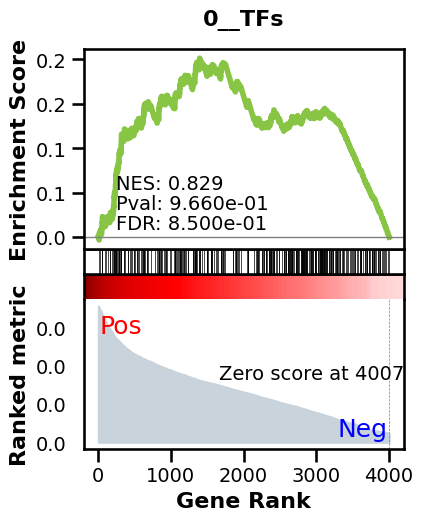

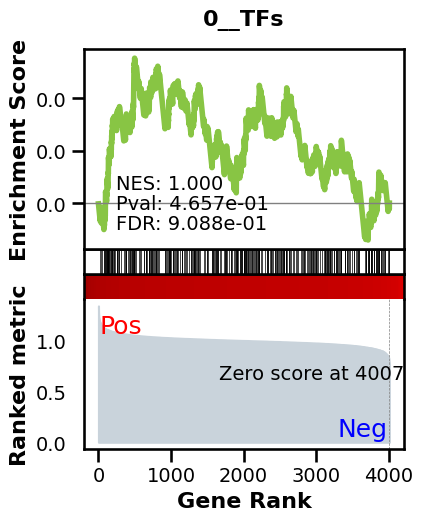

_________________________________________
TF specific enrichment


found some significant results for  4.651162790697675 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.002379879560750974 
recall:  0.3180096940321115 
random precision: 0.0016125679668576004



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 66.30it/s]


 11%|█         | 14/128 [00:00<00:01, 67.30it/s]


 16%|█▋        | 21/128 [00:00<00:01, 67.71it/s]


 22%|██▏       | 28/128 [00:00<00:01, 67.92it/s]


 27%|██▋       | 35/128 [00:00<00:01, 67.95it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.01it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.08it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.04it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.06it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.07it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.05it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.03it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.05it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.01it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.03it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.03it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.10it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.12it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 67.96it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001792592272836734


EPR: 0.892028866647713


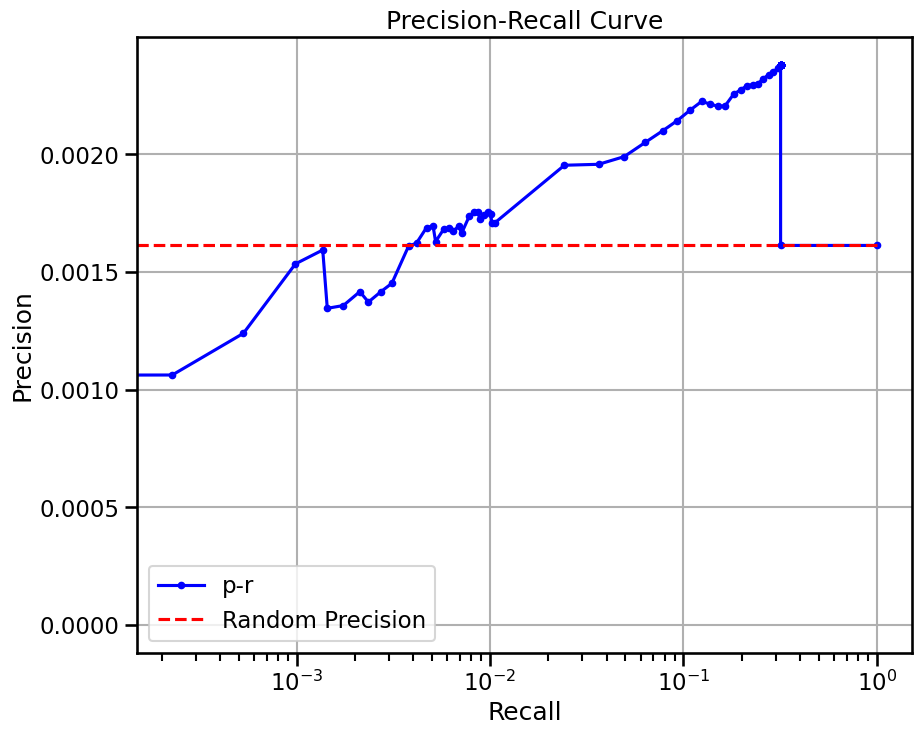

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    to_use = [x for x in to_use if x in genes]
    to_use = to_use[:NUM_GENES]
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)]
    print(celltype)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [9]:
metrics

{'genie3_tf_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Kupffer cells'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 9.67741935483871,
  'precision': 0.004694979579192341,
  'recall': 0.3366297778824268,
  'rand_precision': 0.001085814360770578,
  'auprc': 0.0026139313045358283,
  'epr': 6.658363473886484},
 'genie3_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Ionocytes',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Cholangio

In [ ]:
True
True
True
True
True
True
False
False
True
True
True
True
False
False
False
False
True
True


In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell   6.658363  0.002614   
1     kidney distal convoluted tubule epithelial cell   1.519671  0.001091   
2   kidney loop of Henle thick ascending limb epit...   4.006350  0.003174   
3   kidney loop of Henle thick ascending limb epit...   0.733827  0.001207   
4               kidney collecting duct principal cell  10.817611  0.005050   
5               kidney collecting duct principal cell   1.180155  0.001457   
6                                      mesangial cell   6.661466  0.002720   
7                                      mesangial cell   0.844504  0.001230   
8                     blood vessel smooth muscle cell   7.137739  0.005112   
9                     blood vessel smooth muscle cell   1.040759  0.001809   
10                                           podocyte   5.989453  0.004892   
11                                           podocyte   0.852670  0.001529   
12                                         macrophage   6.511275  0.004315   
13                                         macrophage   0.923230  0.001426   
14                                          leukocyte  13.631811  0.005608   
15                                          leukocyte   0.918213  0.001631   
16                     kidney interstitial fibroblast   7.380613  0.006138   
17                     kidney interstitial fibroblast   0.892029  0.001793   

        RAND   TF_targ  TF_enr  TF_only  
0   0.001086  9.677419    True     True  
1   0.001086  0.000000   False    False  
2   0.001211  2.500000    True     True  
3   0.001211  7.500000   False    False  
4   0.001392  2.857143    True     True  
5   0.001392  1.428571   False    False  
6   0.001223  4.761905    True     True  
7   0.001223  2.380952   False    False  
8   0.001645  9.433962    True     True  
9   0.001645  1.886792   False    False  
10  0.001521  2.127660    True     True  
11  0.001521  2.127660   False    False  
12  0.001401  2.439024    True     True  
13  0.001401  2.439024   False    False  
14  0.001420  0.000000    True     True  
15  0.001420  5.263158   False    False  
16  0.001613  4.651163    True     True  
17  0.001613  4.651163   False    False